# Hold-Winters Method

In [18]:
import numpy as np
import pandas as pd
%matplotlib inline

In [19]:
df = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/airline_passengers.csv', index_col='Month', parse_dates=True )


In [20]:
df = df.dropna()
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
# identify the frequency of the data
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

NOTE: freq=None

In [22]:
# set the frequency to monthly start
df.index.freq = 'MS'

In [23]:
# check again the frequency
df.index.freq

<MonthBegin>

In [24]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## 1. Simple Exponential Smoothing

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


## Using Simple Exponential Smoothing

In [26]:
# set span and alpha for 12-month span
span = 12
alpha = 2 / (span + 1)

In [27]:
# new column for EWMA
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [28]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


## Using Stastmodel
1. create the model
2. fit the model
3. grab the fitted values from the model 

In [29]:
model = SimpleExpSmoothing(df['Thousands of Passengers']) 

In [30]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [31]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

Due to optimised = false, there is a repeat of 112.000000

In [32]:
# shift by one to align with original data and create new column
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [33]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [34]:
# one liner version
#df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

## Dobuble Exponential Smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing    

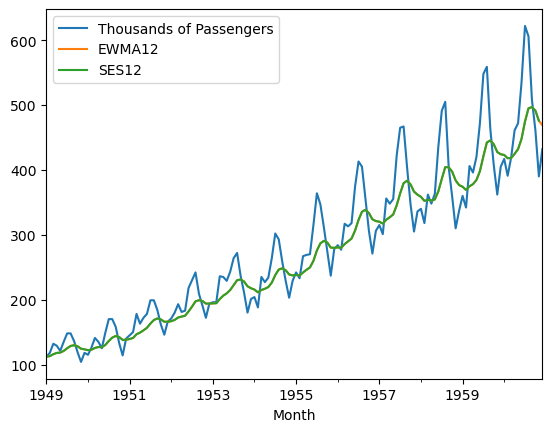

In [42]:
df.plot()

import matplotlib.pyplot as plt
plt.show()

In [43]:
# double Exponential Smoothing
# add a new column for DES with alpha=0.2 and beta=0.1
# treand='add' for additive trend - linear trend
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [44]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.237766
1949-02-01,118,112.923077,112.923077,120.237766
1949-03-01,132,115.857988,115.857988,134.237765
1949-04-01,129,117.879836,117.879836,131.237766
1949-05-01,121,118.359861,118.359861,123.237766


In [45]:
# list of columns
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

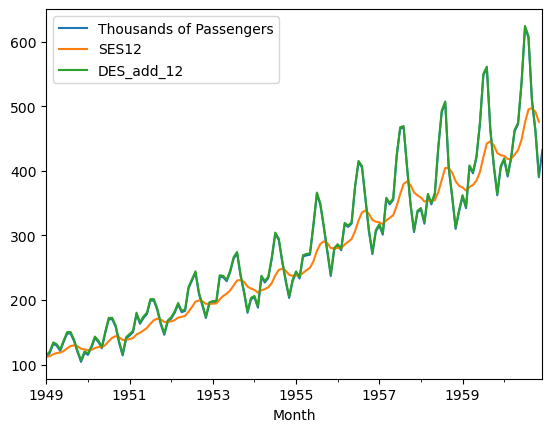

In [46]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot()
plt.show()

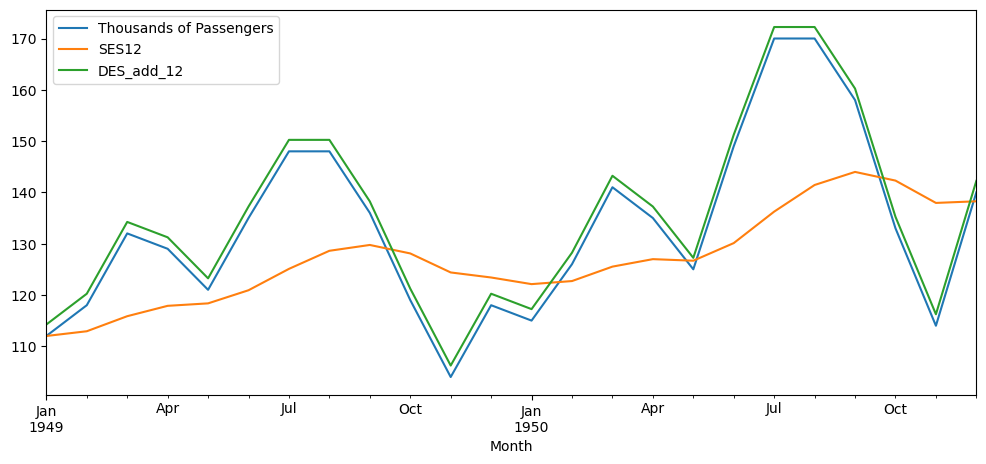

In [ ]:
# Zoom in to see the differences better - first 24 months
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))
plt.show()

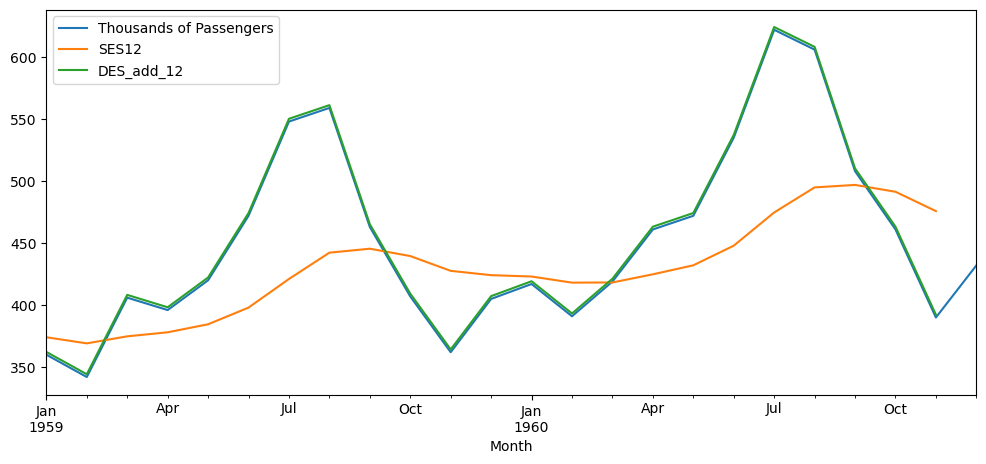

In [49]:
# Zoom in to see the differences better - last 24 months
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))
plt.show()

Check multiplicative to compare with linear

In [50]:
# double Exponential Smoothing - Multiplicative Trend
# add a new column for DES with multiplicative trend
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

In [51]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12'],
      dtype='object')

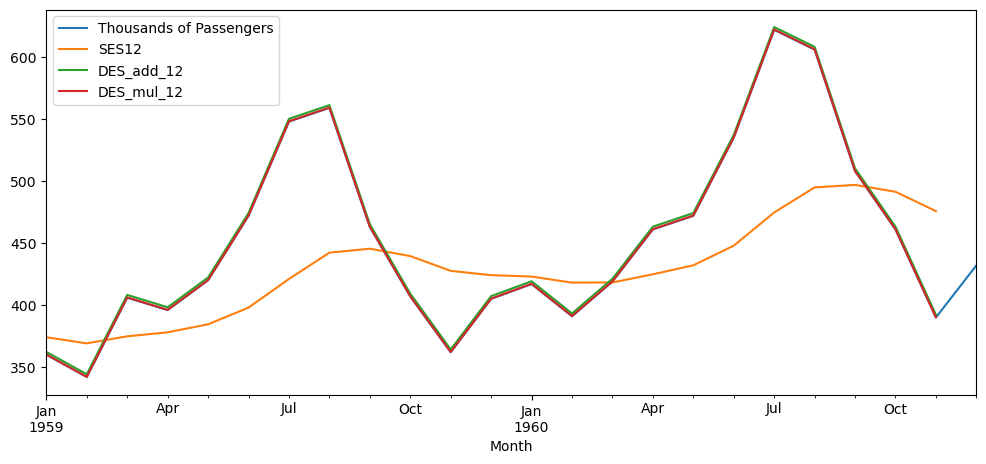

In [52]:
# plot to compare multiplicative to additive
df[['Thousands of Passengers','SES12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5))
plt.show()

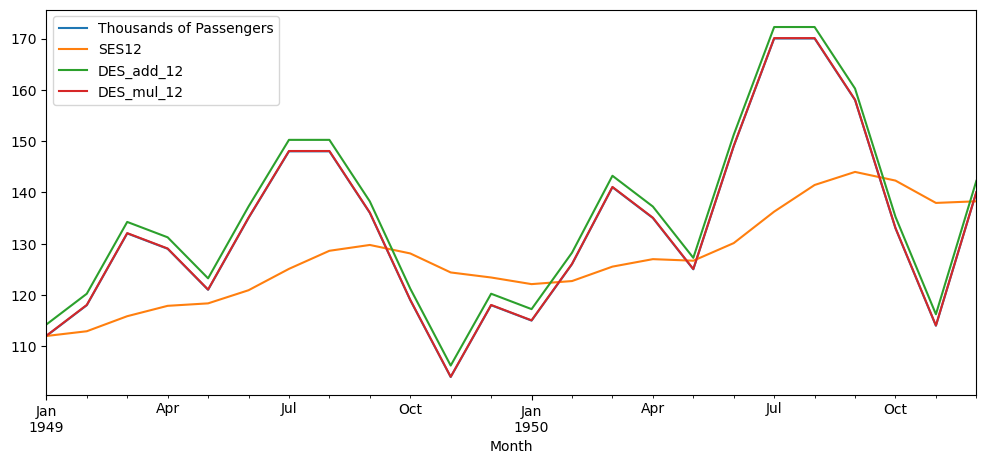

In [53]:
# model that can estimate well in the earlier years
# Zoom in to see the differences better - first 24 months
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5))
plt.show()

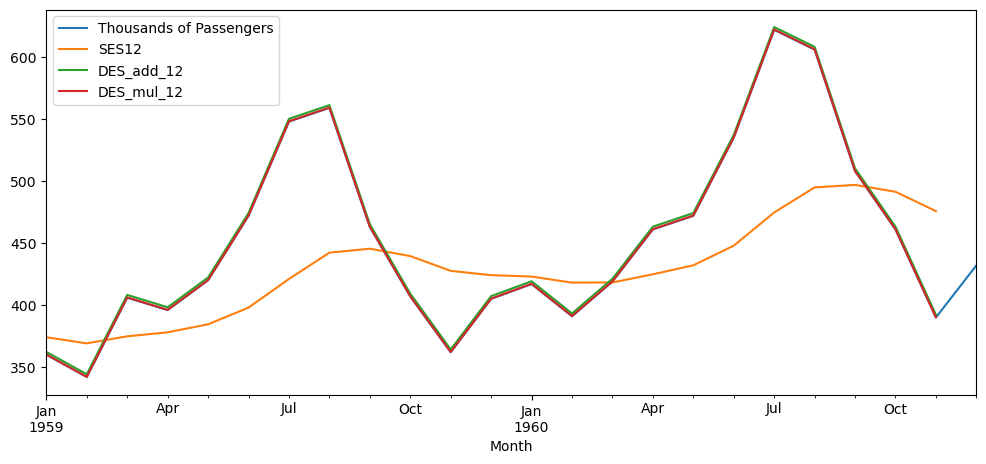

In [54]:
# Zoom in to see the differences better - last 24 months
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5))
plt.show()

## Triple Exponential Smoothing

In [ ]:
# triple Exponential Smoothing
# have to consider seasonality now linear or multiplicative
# don't shift the fitted values here as it is handled by seasonal component
df['TES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

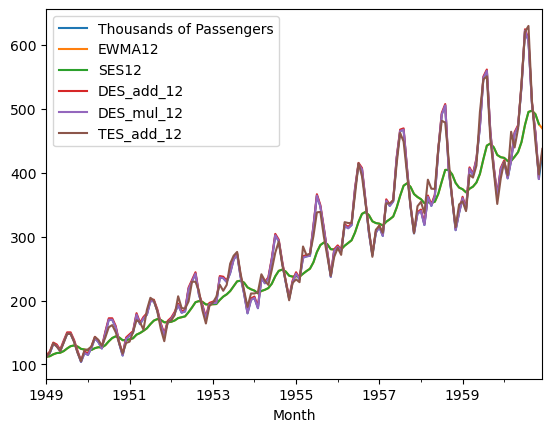

In [56]:
df.plot()
plt.show()

In [57]:
# columns
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_add_12'],
      dtype='object')

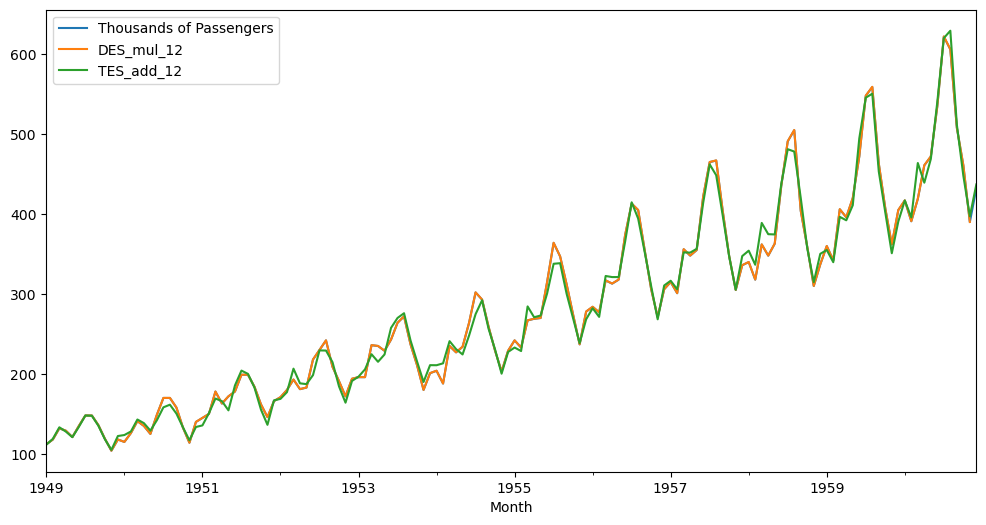

In [58]:
# compare the double and triple exponential smoothing
df[['Thousands of Passengers', 'DES_mul_12', 'TES_add_12']].plot(figsize=(12,6))
plt.show()

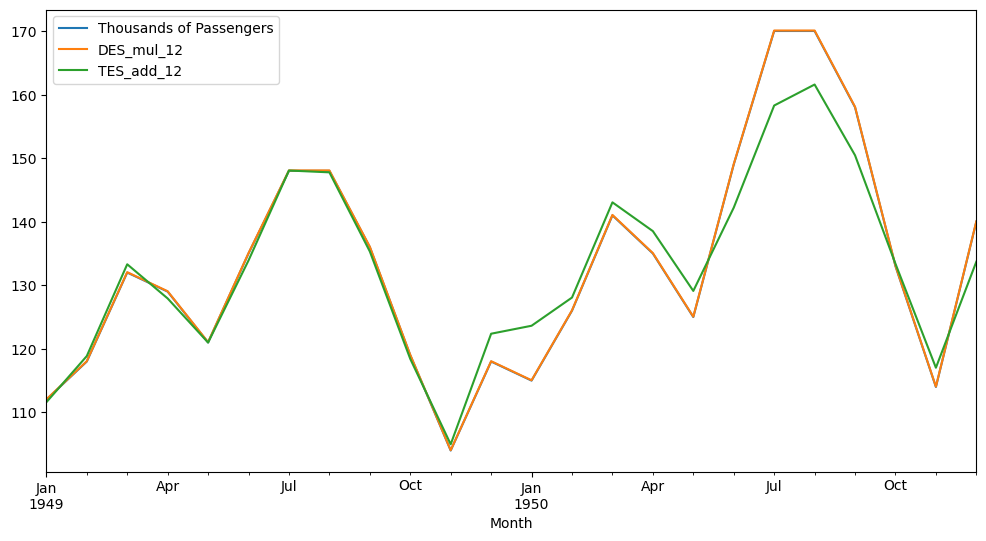

In [59]:
# 1st 24 months
df[['Thousands of Passengers', 'DES_mul_12', 'TES_add_12']].iloc[:24].plot(figsize=(12,6))
plt.show()

In the 1st 2 years DES seems to be performing better than TES

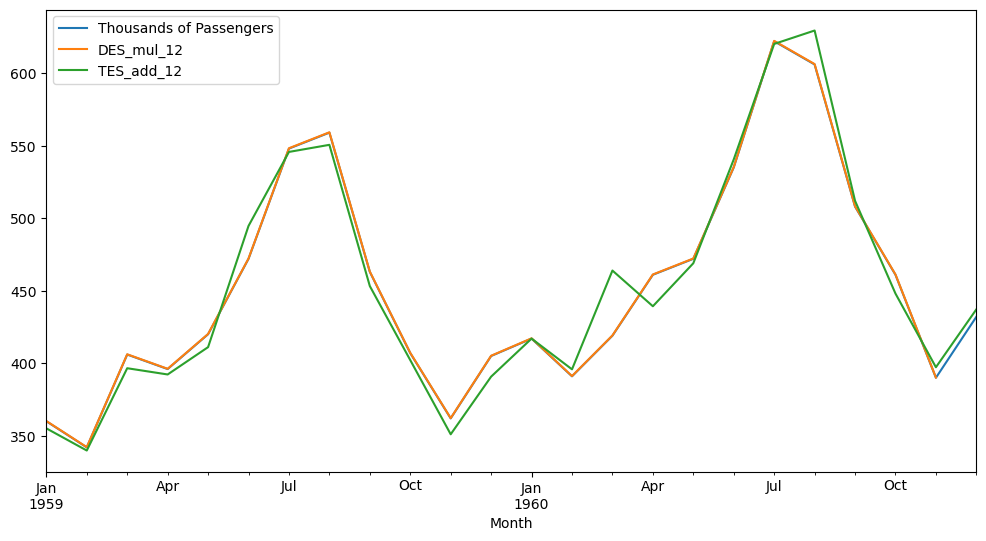

In [60]:
# last 24 months
df[['Thousands of Passengers', 'DES_mul_12', 'TES_add_12']].iloc[-24:].plot(figsize=(12,6))
plt.show()

TES is starting to fit better